In [2]:
import csv
import itertools
import time
import timeit

import numpy as np

from skimage.filters import threshold_mean
from skimage.morphology import skeletonize
from skimage import graph as skgraph

import networkx as nx

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import colors
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%matplotlib inline

from utils.plotting import *
from utils.process import *


## Read in MNIST data

In [3]:
mnist_filename = '../data/mnist/mnist_test.csv'
mnist_images, mnist_labels = read_in_mnist(mnist_filename)
mnist_binaries = [create_binary(image) for image in mnist_images]
mnist_skeletons = [create_skeleton(binary) for binary in mnist_binaries]


In [4]:
print(len(mnist_labels))
print(len(mnist_images))
print(len(mnist_binaries))
print(len(mnist_skeletons))


10000
10000
10000
10000


In [5]:
idx_0 = 10
idx_4 = 4
idx_5 = 694
idx_8 = 3406

label_0 = mnist_labels[idx_0]
label_4 = mnist_labels[idx_4]
label_5 = mnist_labels[idx_5]
label_8 = mnist_labels[idx_8]

img_0 = mnist_images[idx_0]
img_4 = mnist_images[idx_4]
img_5 = mnist_images[idx_5]
img_8 = mnist_images[idx_8]


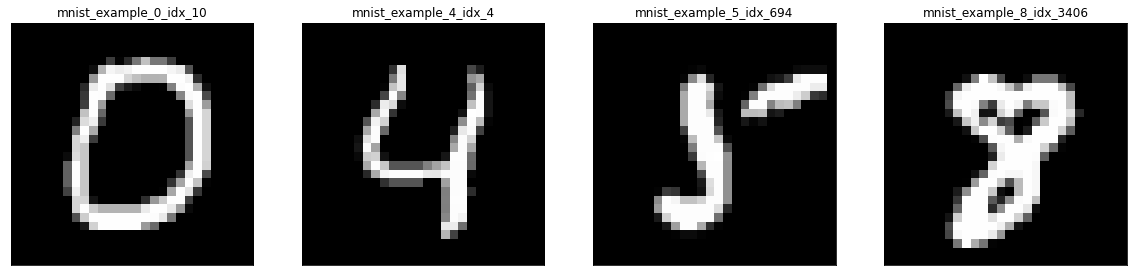

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(20, 15))

ax[0].imshow(img_0, cmap="gray")
ax[1].imshow(img_4, cmap="gray")
ax[2].imshow(img_5, cmap="gray")
ax[3].imshow(img_8, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])

ax[0].set_title("mnist_example_{}_idx_{}".format(label_0, idx_0))
ax[1].set_title("mnist_example_{}_idx_{}".format(label_4, idx_4))
ax[2].set_title("mnist_example_{}_idx_{}".format(label_5, idx_5))
ax[3].set_title("mnist_example_{}_idx_{}".format(label_8, idx_8))

plt.show()


## Create image binaries, skeletons

In [7]:
binary_0 = mnist_binaries[idx_0]
binary_4 = mnist_binaries[idx_4]
binary_5 = mnist_binaries[idx_5]
binary_8 = mnist_binaries[idx_8]

skeleton_0 = mnist_skeletons[idx_0]
skeleton_4 = mnist_skeletons[idx_4]
skeleton_5 = mnist_skeletons[idx_5]
skeleton_8 = mnist_skeletons[idx_8]


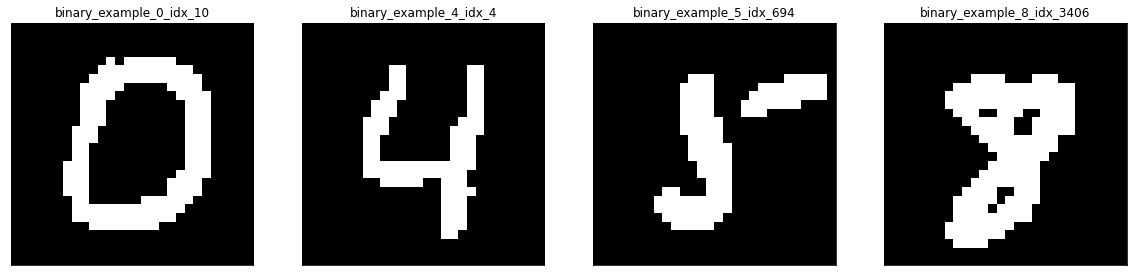

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(20, 15))

ax[0].imshow(binary_0, cmap="gray")
ax[1].imshow(binary_4, cmap="gray")
ax[2].imshow(binary_5, cmap="gray")
ax[3].imshow(binary_8, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0].set_title("binary_example_{}_idx_{}".format(label_0, idx_0))
ax[1].set_title("binary_example_{}_idx_{}".format(label_4, idx_4))
ax[2].set_title("binary_example_{}_idx_{}".format(label_5, idx_5))
ax[3].set_title("binary_example_{}_idx_{}".format(label_8, idx_8))

plt.show()


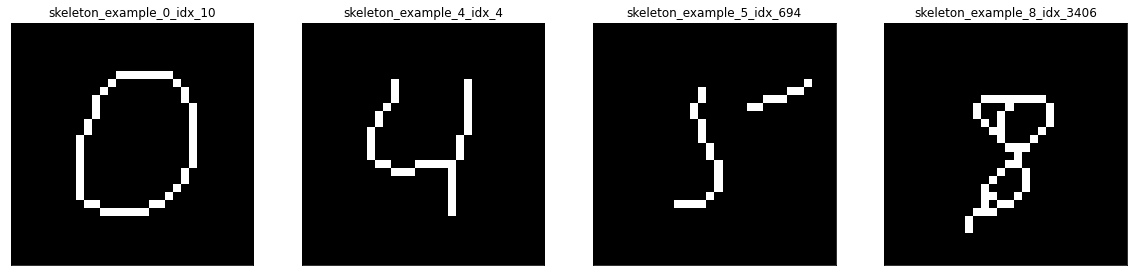

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(20, 15))

ax[0].imshow(skeleton_0, cmap="gray")
ax[1].imshow(skeleton_4, cmap="gray")
ax[2].imshow(skeleton_5, cmap="gray")
ax[3].imshow(skeleton_8, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0].set_title("skeleton_example_{}_idx_{}".format(label_0, idx_0))
ax[1].set_title("skeleton_example_{}_idx_{}".format(label_4, idx_4))
ax[2].set_title("skeleton_example_{}_idx_{}".format(label_5, idx_5))
ax[3].set_title("skeleton_example_{}_idx_{}".format(label_8, idx_8))

plt.show()


## Convert image skeletons into skeleton graphs

In [10]:
# then convert to scipy sparse array
skeleton_array_0, coordinates_0 = create_skeleton_graph(skeleton_0, connectivity=2)
skeleton_array_4, coordinates_4 = create_skeleton_graph(skeleton_4, connectivity=2)
skeleton_array_5, coordinates_5 = create_skeleton_graph(skeleton_5, connectivity=2)
skeleton_array_8, coordinates_8 = create_skeleton_graph(skeleton_8, connectivity=2)

# create graph from scipy sparse array, get node locations and save as dict
skeleton_graph_0 = nx.from_scipy_sparse_array(skeleton_array_0)
skeleton_graph_4 = nx.from_scipy_sparse_array(skeleton_array_4)
skeleton_graph_5 = nx.from_scipy_sparse_array(skeleton_array_5)
skeleton_graph_8 = nx.from_scipy_sparse_array(skeleton_array_8)

# create node lookup dictionaries based on skeleton coordinates
search_by_node_0, search_by_location_0 = get_node_locations(coordinates_0)
search_by_node_4, search_by_location_4 = get_node_locations(coordinates_4)
search_by_node_5, search_by_location_5 = get_node_locations(coordinates_5)
search_by_node_8, search_by_location_8 = get_node_locations(coordinates_8)


## Path segmentation

### Example 8: complicated junction and multiple loops

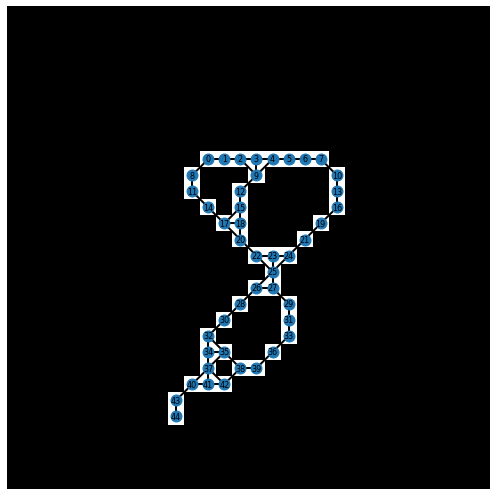

In [11]:
plot_graph(skeleton_8, skeleton_graph_8, coordinates_8, search_by_node_8, node_size=120, label_size=8)


In [12]:
result_dict_8 = TGGLinesPlus(skeleton_8)


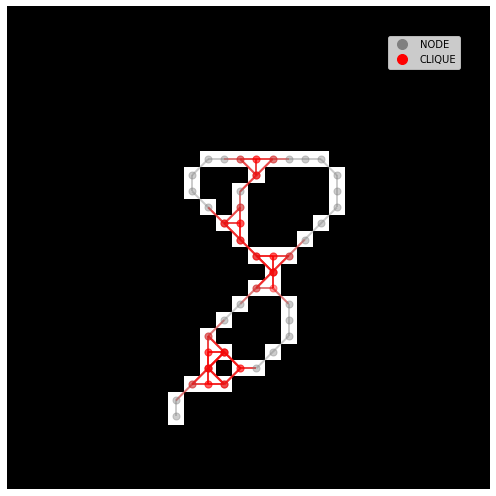

In [13]:
plot_cliques(result_dict_8, node_size=50, node_labels=False)


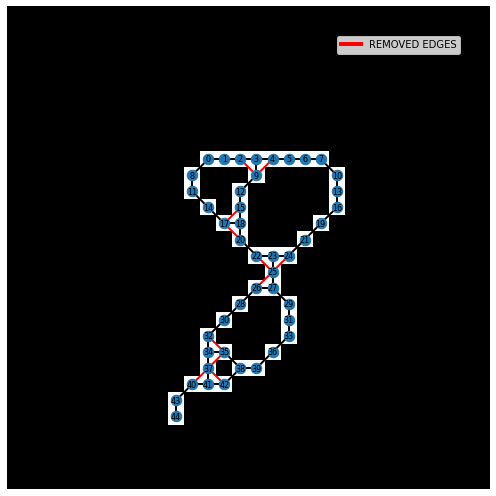

In [14]:
plot_removed_edges(result_dict_8, node_size=110, label_size=8)


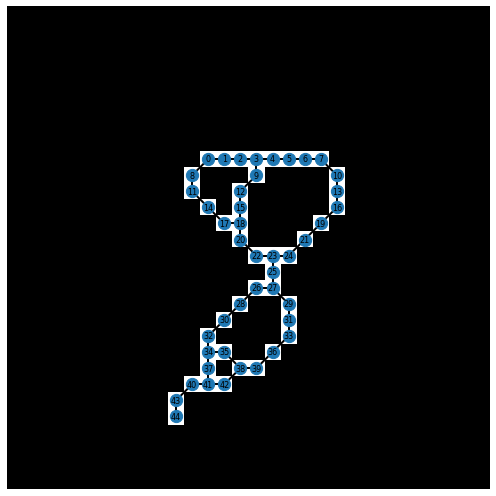

In [15]:
plot_simplified_graph(result_dict_8, node_size=150, label_size=8)


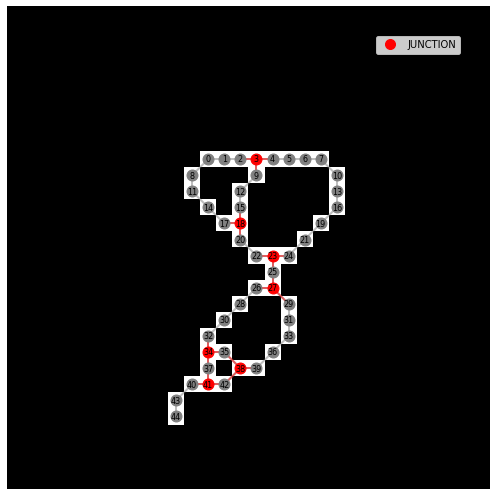

In [16]:
plot_junctions(result_dict_8, node_size=120, label_size=8)


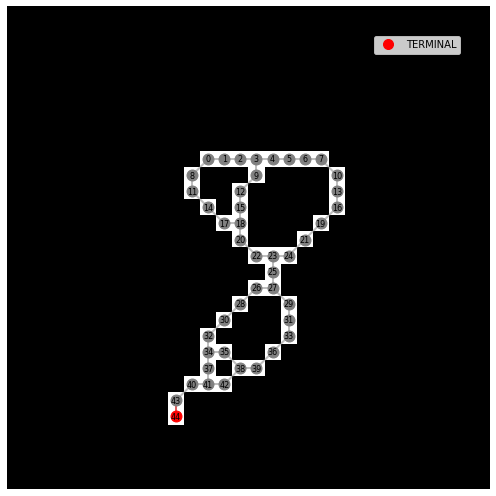

In [17]:
plot_terminals(result_dict_8, node_size=120, label_size=8)


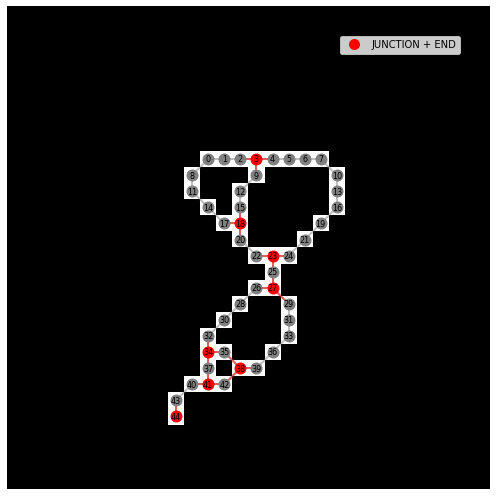

In [18]:
plot_pathseg_endpoints(result_dict_8, node_size=120, label_size=8)


This is the colormap we use for plotting paths after the graph has been segmented, but feel free to design your own.

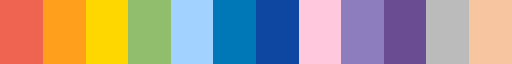

In [19]:
# should not contain colors close to limegreen and cherry red
custom_color_list = ["#ef6351", "#ff9f1c", "#ffd700", # yellows and oranges
                     "#90be6d",                       # greens
                    "#a2d2ff", "#0077b6", "#0d47a1",  # blues
                     "#ffc8dd", "#8e7dbe", "#6a4c93", # purples
                    "#bbbbbb", "#f7c59f"]             # grey and brown

cmap = ListedColormap(custom_color_list, name="Path Segmentation")
cmap

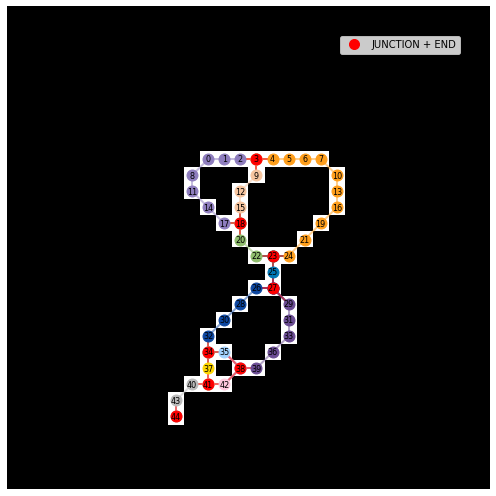

In [20]:
plot_graph_paths(result_dict_8, node_size=120, label_size=8, show_legend=True)


### Example 5: separated subgraphs

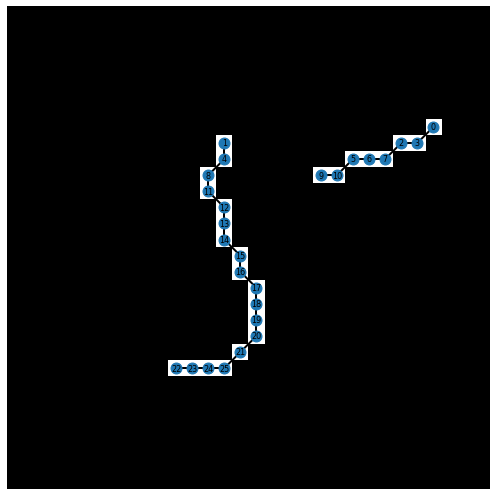

In [21]:
plot_graph(skeleton_5, skeleton_graph_5, coordinates_5, search_by_node_5, node_size=120, label_size=8)


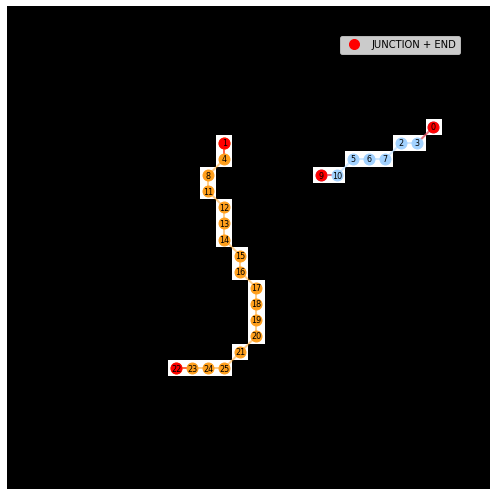

In [22]:
result_dict_5 = TGGLinesPlus(skeleton_5)
plot_graph_paths(result_dict_5, node_size=120, label_size=8, show_legend=True)


### Example 0: a continuous loop with no junctions or end nodes

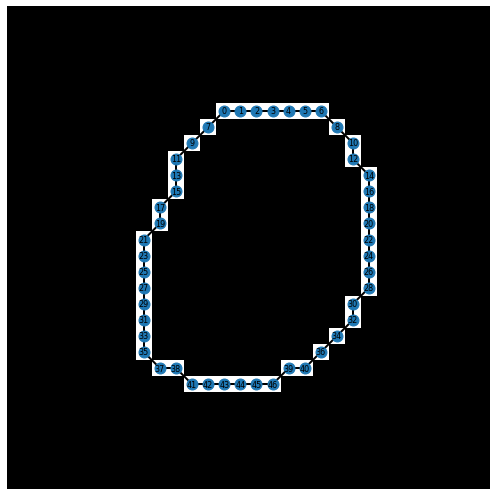

In [23]:
plot_graph(skeleton_0, skeleton_graph_0, coordinates_0, search_by_node_0, node_size=120, label_size=8)


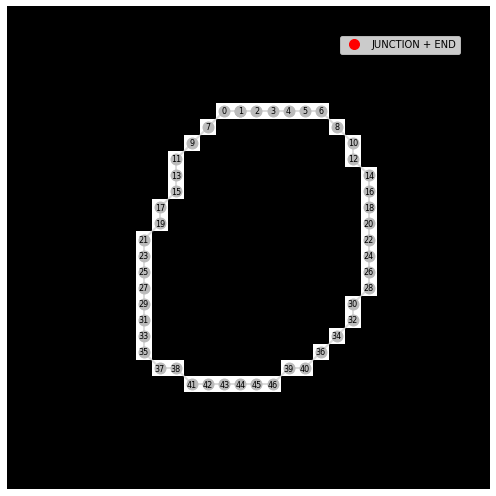

In [24]:
result_dict_0 = TGGLinesPlus(skeleton_0)
plot_graph_paths(result_dict_0, node_size=120, label_size=8, show_legend=True)


### Example 4: a junction with no loops

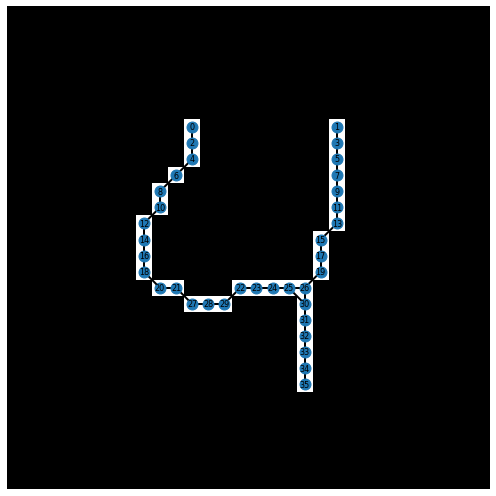

In [25]:
plot_graph(skeleton_4, skeleton_graph_4, coordinates_4, search_by_node_4, node_size=120, label_size=8)


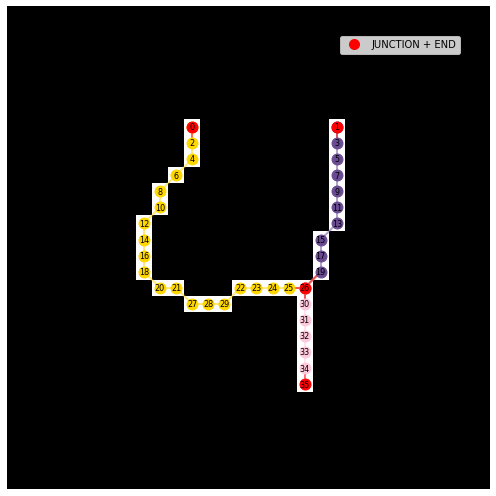

In [26]:
result_dict_4 = TGGLinesPlus(skeleton_4)
plot_graph_paths(result_dict_4, node_size=120, label_size=8, show_legend=True)


### Another interesting example: a graph with multiple loops

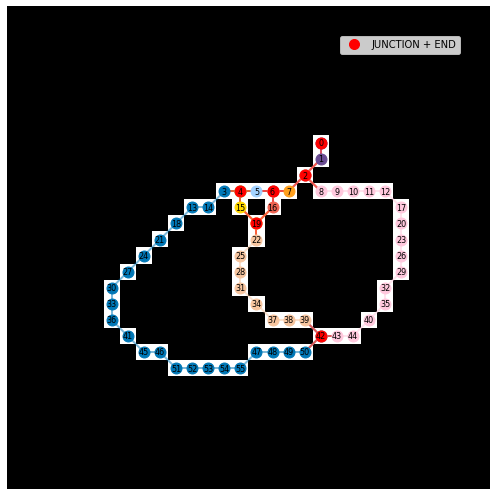

In [27]:
idx_5165 = 5165
label_5165 = mnist_labels[idx_5165]
img_5165 = mnist_images[idx_5165]
skeleton_5165 = mnist_skeletons[idx_5165]

result_dict_5165 = TGGLinesPlus(skeleton_5165)
plot_graph_paths(result_dict_5165, node_size=120, label_size=8, show_legend=True)


### Two examples with cycles

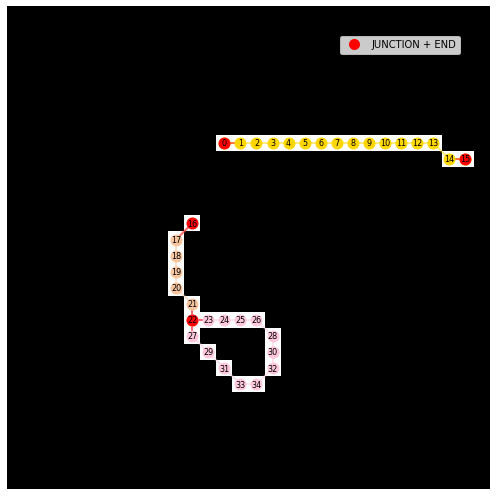

In [28]:
idx_1911 = 1911
label_1911 = mnist_labels[idx_1911]
img_1911 = mnist_images[idx_1911]
skeleton_1911 = mnist_skeletons[idx_1911]

result_dict_1911 = TGGLinesPlus(skeleton_1911)
plot_graph_paths(result_dict_1911, node_size=120, label_size=8, show_legend=True)


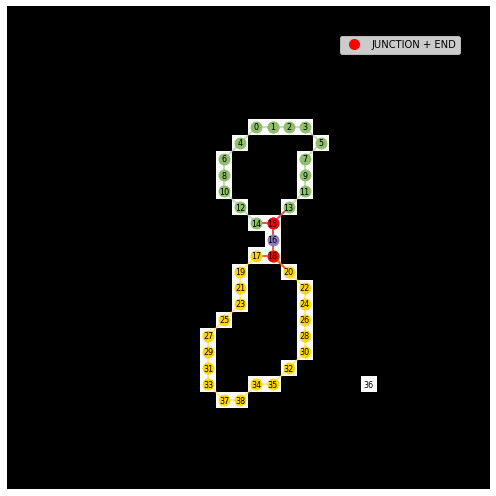

In [29]:
idx_5061 = 5061
label_5061 = mnist_labels[idx_5061]
img_5061 = mnist_images[idx_5061]
skeleton_5061 = mnist_skeletons[idx_5061]

result_dict_5061 = TGGLinesPlus(skeleton_5061)
plot_graph_paths(result_dict_5061, node_size=120, label_size=8, show_legend=True)


### A few examples with junction "clusters"

In [30]:
# idx_572 = 572
# idx_1229 = 1229
# idx_2254 = 2254
# idx_2918 = 2918

idx = 2254
label = mnist_labels[idx]
img = mnist_images[idx]
binary = mnist_binaries[idx]
skeleton = mnist_skeletons[idx]


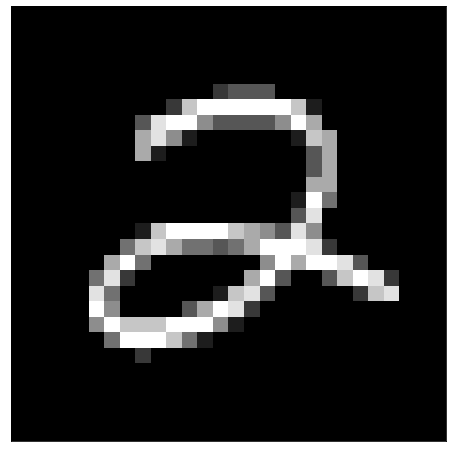

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(img, cmap="gray")

ax.set_xticks([])
ax.set_yticks([])
    
plt.show()


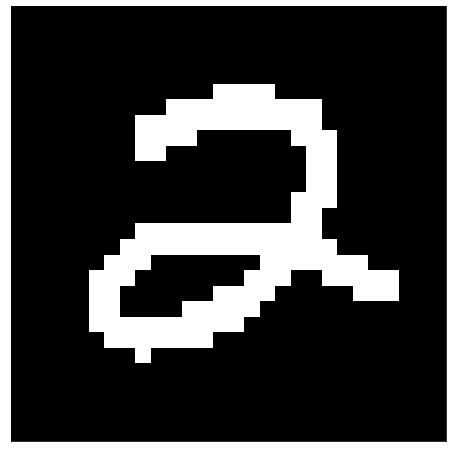

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(binary, cmap="gray")

ax.set_xticks([])
ax.set_yticks([])
    
plt.show()


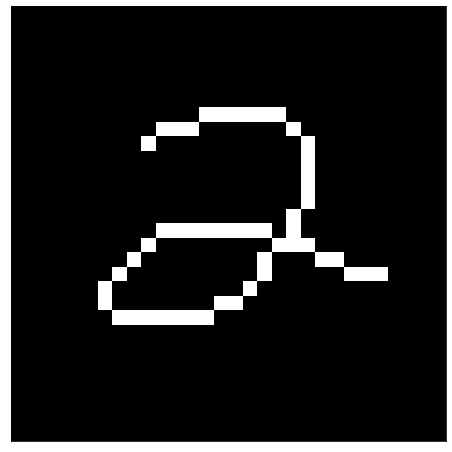

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(skeleton, cmap="gray")

ax.set_xticks([])
ax.set_yticks([])
    
plt.show()


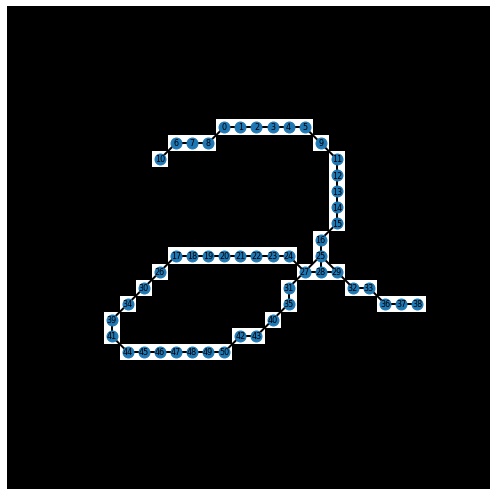

In [34]:
skeleton_array, coordinates = create_skeleton_graph(skeleton, connectivity=2)
skeleton_graph = nx.from_scipy_sparse_array(skeleton_array)
search_by_node, search_by_location = get_node_locations(coordinates)

plot_graph(skeleton, skeleton_graph, coordinates, search_by_node, node_size=120, label_size=8)


In [35]:
result_dict = TGGLinesPlus(skeleton)


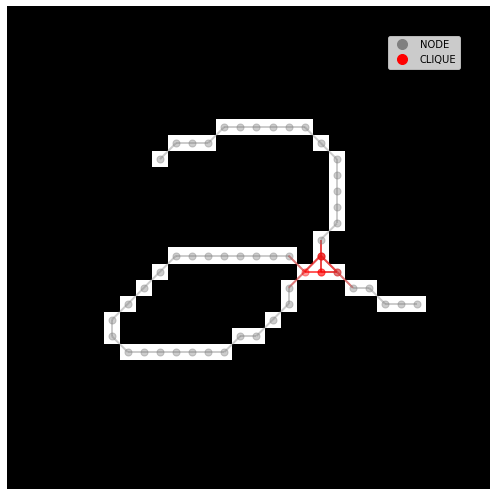

In [36]:
plot_cliques(result_dict, "", node_size=50, node_labels=False)


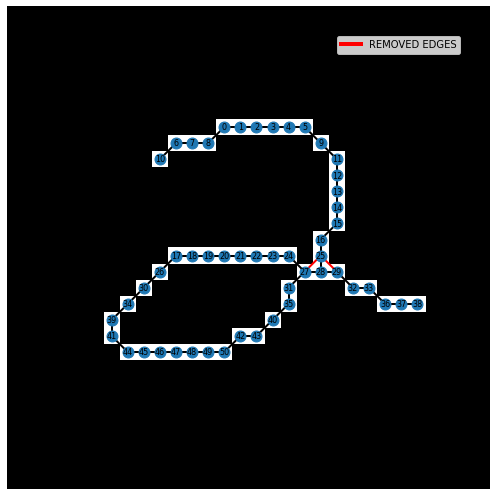

In [37]:
plot_removed_edges(result_dict, node_size=120, label_size=8)


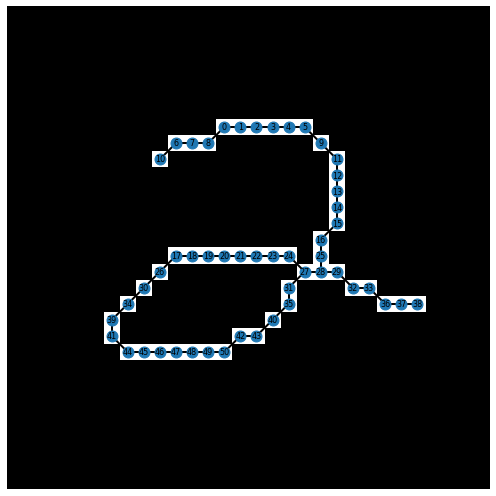

In [38]:
plot_simplified_graph(result_dict, node_size=120, label_size=8)


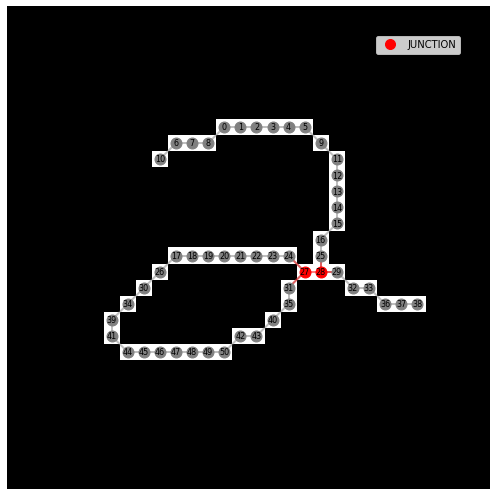

In [39]:
plot_junctions(result_dict, node_size=120, label_size=8)


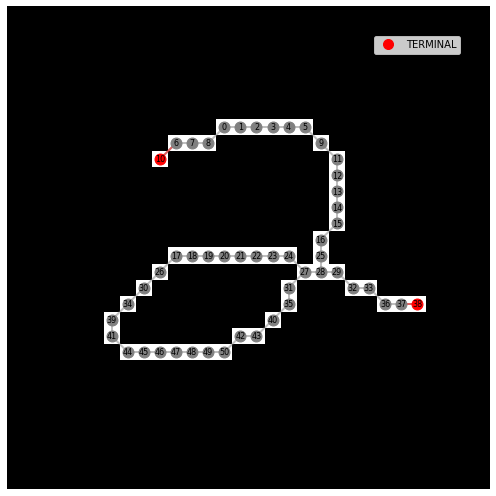

In [40]:
plot_terminals(result_dict, node_size=120, label_size=8)


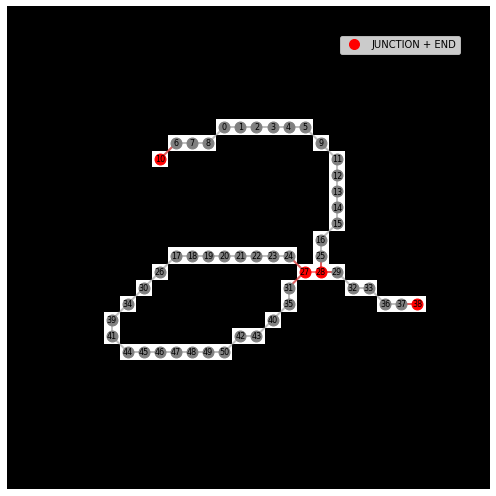

In [41]:
plot_pathseg_endpoints(result_dict, node_size=120, label_size=8)


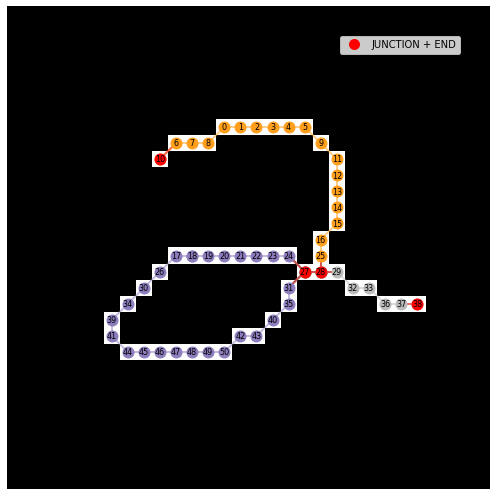

In [42]:
plot_graph_paths(result_dict, node_size=120, label_size=8, show_legend=True)


## A full processing pipeline

### Test the full processing pipeline's runtime

`timeit.default_timer()` measurements can be affected by other programs running on the same machine, so the best thing to do when accurate timing is necessary is to repeat the timing a few times and use the best time. The `-r` option is good for this; the default of 5 repetitions is probably enough in most cases. You can use `time.process_time()` to measure CPU time.

But we can only use `-r` for repetitions from the command line.

In [33]:
start = timeit.default_timer()

# note: we have already created the skeletons from the input images
result_dict_list = [TGGLinesPlus(img) for img in mnist_skeletons]

stop = timeit.default_timer()
print(f"Time to run: {(stop - start):.5f}s")  


Time to run: 30.04118s
